## Importing Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

#!pip install termcolor
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [2]:
#Importing dataset
dataset = pd.read_csv('Fraud.csv')
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Observing the statistics of the data
print("Statistics of the Dataset: \n")
dataset.describe()

Statistics of the Dataset: 



,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
# Checking if there is NaN values in the dataset
dataset.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
#making a copy of data before making any changes
new_data = dataset.copy(deep = True)
new_data.drop(['nameOrig','nameDest'], axis = 1, inplace = True)
new_data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [6]:
#One hot encoding the Payment type
dummies = pd.get_dummies(new_data.type)
df = pd.concat([dummies, new_data], axis = 'columns')
df.drop(['type', 'TRANSFER'], axis = 1, inplace = True)
df

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,0,0,1,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,0,0,0,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,0,0,0,0,1,181.00,181.00,0.00,0.00,0.00,1,0
3,0,1,0,0,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,0,0,0,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,0,1,0,0,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,0,0,0,0,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,0,1,0,0,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,0,0,0,0,743,850002.52,850002.52,0.00,0.00,0.00,1,0


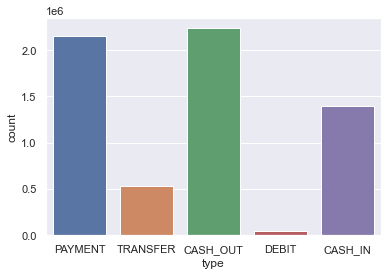

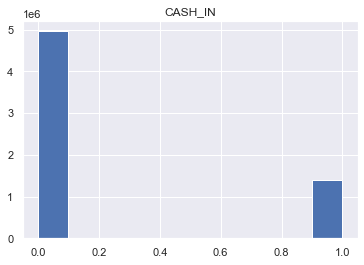

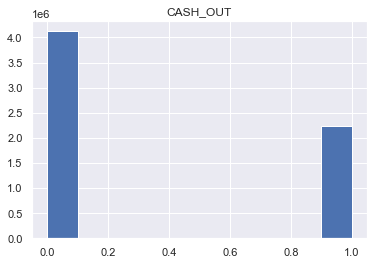

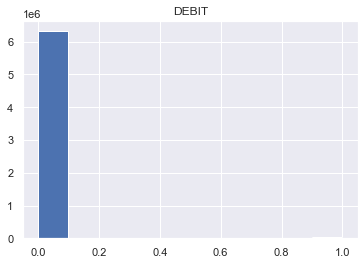

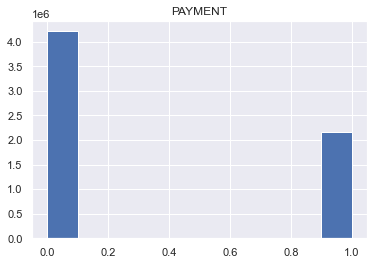

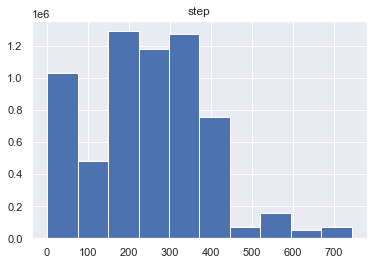

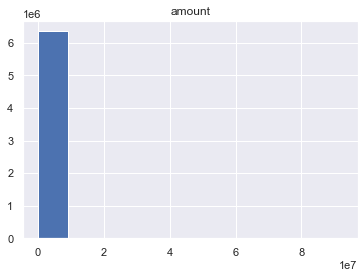

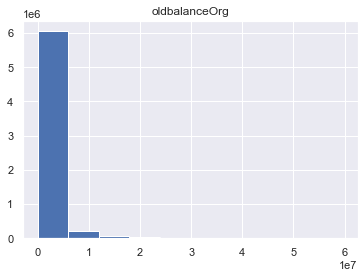

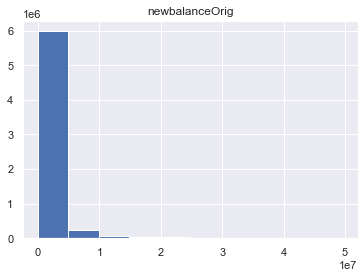

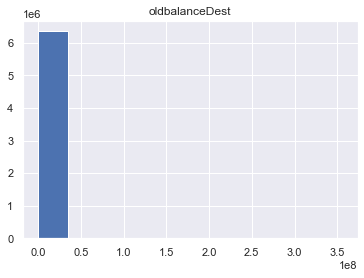

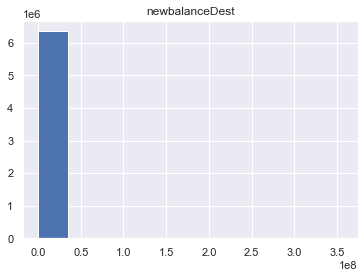

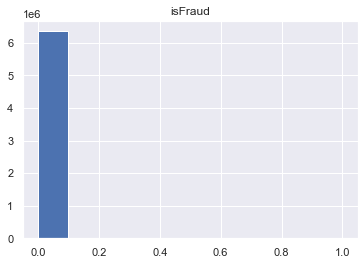

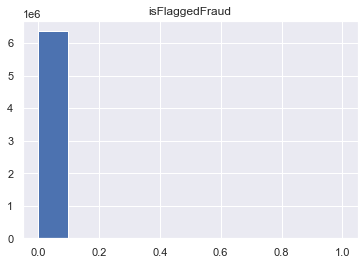

In [7]:
#Visualising the data
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="type", data=dataset)

for x in df.describe().columns:
    df.hist(column=x)

<AxesSubplot:>

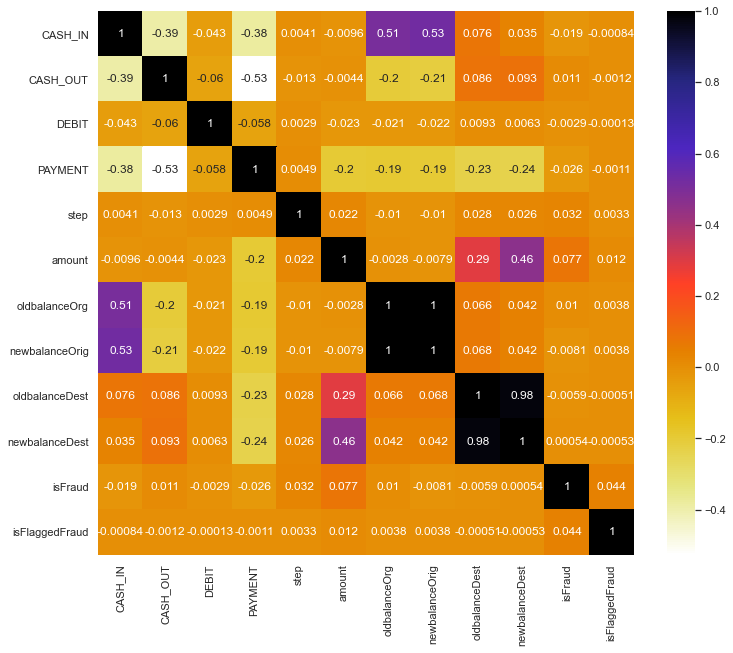

In [8]:
#using Heatmap to find correlation
plt.figure(figsize = (12,10))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)

In [9]:
# Thus we found out that newBalanceOrig, oldBalanceOrig and oldbalanceDest,newbalanceDest are highly correlated. Thus eliminating one of them
df.drop(['oldbalanceOrg', 'oldbalanceDest'], axis = 1, inplace = True)
df

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,0,0,0,1,1,9839.64,160296.36,0.00,0,0
1,0,0,0,1,1,1864.28,19384.72,0.00,0,0
2,0,0,0,0,1,181.00,0.00,0.00,1,0
3,0,1,0,0,1,181.00,0.00,0.00,1,0
4,0,0,0,1,1,11668.14,29885.86,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,0,1,0,0,743,339682.13,0.00,339682.13,1,0
6362616,0,0,0,0,743,6311409.28,0.00,0.00,1,0
6362617,0,1,0,0,743,6311409.28,0.00,6379898.11,1,0
6362618,0,0,0,0,743,850002.52,0.00,0.00,1,0


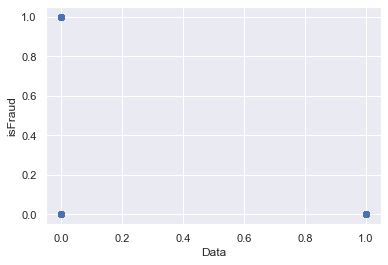

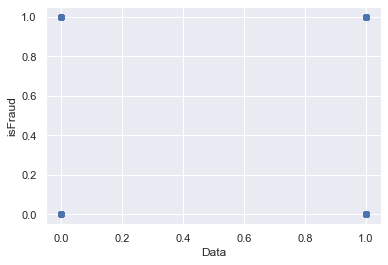

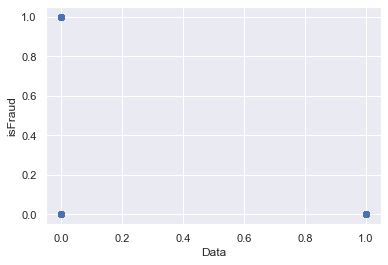

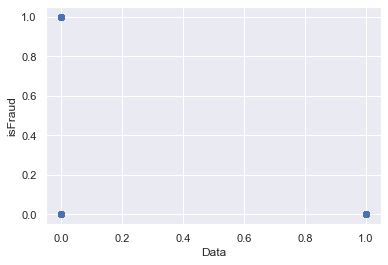

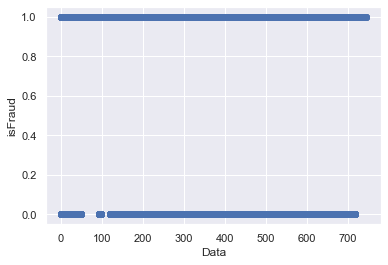

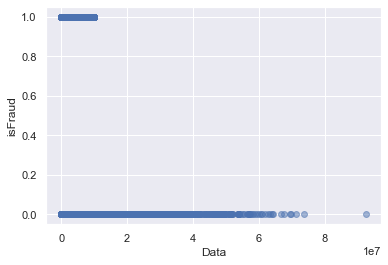

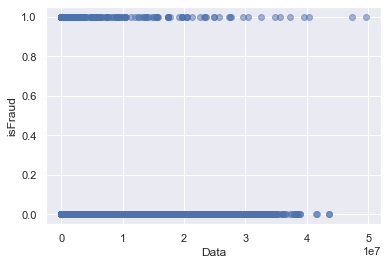

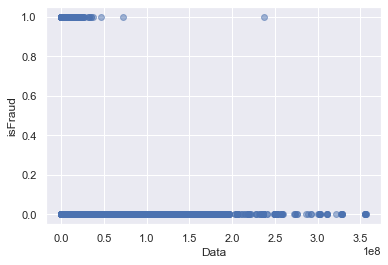

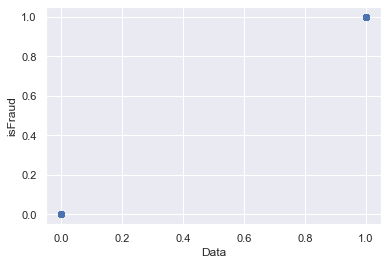

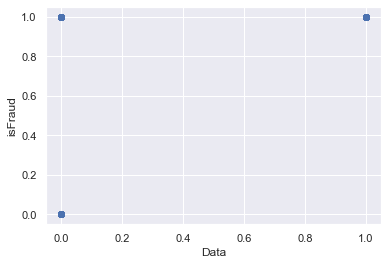

In [10]:
for i in range(0, 10):
    x_temp = df.iloc[:, i]
    y_temp = df.iloc[:, 8]
    plt.scatter(x_temp, y_temp, alpha = 0.5)
    plt.xlabel('Data')
    plt.ylabel('isFraud')
    plt.show()

## Scaling the values

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

#step 	amount 	newbalanceOrig 	newbalanceDest

df['scaled_step'] = rob_scaler.fit_transform(df['step'].values.reshape(-1,1))
df['scaled_amount'] = rob_scaler.fit_transform(df['amount'].values.reshape(-1,1))
df['scaled_newBalOrig'] = rob_scaler.fit_transform(df['newbalanceOrig'].values.reshape(-1,1))
df['scaled_newBalDest'] = rob_scaler.fit_transform(df['newbalanceDest'].values.reshape(-1,1))


df.drop(['step','amount', 'newbalanceOrig', 'newbalanceDest'], axis=1, inplace=True)

In [12]:
df

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,isFraud,isFlaggedFraud,scaled_step,scaled_amount,scaled_newBalOrig,scaled_newBalDest
0,0,0,0,1,0,0,-1.329609,-0.332932,1.111175,-0.193057
1,0,0,0,1,0,0,-1.329609,-0.373762,0.134375,-0.193057
2,0,0,0,0,1,0,-1.329609,-0.382380,0.000000,-0.193057
3,0,1,0,0,1,0,-1.329609,-0.382380,0.000000,-0.193057
4,0,0,0,1,0,0,-1.329609,-0.323571,0.207169,-0.193057
...,...,...,...,...,...,...,...,...,...,...
6362615,0,1,0,0,1,0,2.815642,1.355693,0.000000,0.112438
6362616,0,0,0,0,1,0,2.815642,31.927899,0.000000,-0.193057
6362617,0,1,0,0,1,0,2.815642,31.927899,0.000000,5.544730
6362618,0,0,0,0,1,0,2.815642,3.968274,0.000000,-0.193057



## Under Sampling

In [13]:
# The classes are heavily skewed we need to solve this issue
print('No Frauds :', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds :', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
#print(df['isFraud'].value_counts()[1])

No Frauds : 99.87 % of the dataset
Frauds : 0.13 % of the dataset


In [17]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

# amount of fraud classes 8213 rows.
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0][:12000]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,isFraud,isFlaggedFraud,scaled_step,scaled_amount,scaled_newBalOrig,scaled_newBalDest
6064087,0,0,0,0,1,0,1.486034,22.925760,0.000000,-0.193057
1070136,0,0,0,0,1,0,-0.636872,0.127588,0.000000,-0.193057
6129444,0,0,0,1,0,0,1.692737,-0.227408,0.000000,-0.193057
2210519,1,0,0,0,0,0,-0.296089,0.195227,0.932673,2.885830
811971,0,0,0,1,0,0,-1.111732,-0.378782,0.000000,-0.193057
...,...,...,...,...,...,...,...,...,...,...
634182,1,0,0,0,0,0,-1.139665,-0.335917,102.852645,-0.122798
394642,1,0,0,0,0,0,-1.234637,0.111883,18.808683,-0.131989
3950448,0,0,0,0,1,0,0.268156,8.813382,0.000000,-0.193057
5987927,0,1,0,0,1,0,0.960894,7.111671,0.000000,1.123605


Distribution of the Classes in the subsample dataset
0    0.593677
1    0.406323
Name: isFraud, dtype: float64


C:\Users\Amber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


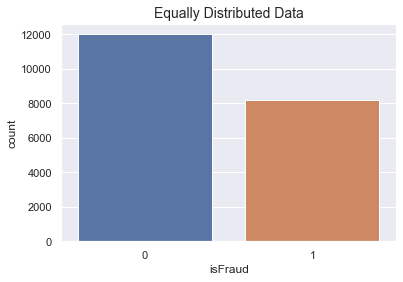

In [18]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['isFraud'].value_counts()/len(new_df))

sns.countplot('isFraud', data=new_df)
plt.title('Equally Distributed Data', fontsize=14)
plt.show()

In [19]:
# Now our data is reaady to process
# Importing machine learning libraries  for train_test_split
from sklearn.model_selection import train_test_split
x = new_df.iloc[:, 0:4]
y = new_df.iloc[:, 4]
x = pd.concat([x, new_df.iloc[:, 5:10]], axis = 'columns')

# Spliting our data further into train and test (train-80% and test-20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)
x_train

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,isFlaggedFraud,scaled_step,scaled_amount,scaled_newBalOrig,scaled_newBalDest
3749863,0,0,0,1,0,0.223464,-0.263779,0.000000,-0.193057
3007096,0,0,0,1,0,-0.039106,-0.308993,0.000000,-0.193057
2817812,0,0,0,1,0,-0.078212,-0.301577,1.012928,-0.193057
2994367,0,1,0,0,0,-0.039106,-0.245016,0.000000,0.054233
1508675,0,1,0,0,0,-0.530726,-0.291709,0.000000,0.408323
...,...,...,...,...,...,...,...,...,...
6344709,0,1,0,0,0,2.530726,10.418654,0.000000,3.350765
1463215,0,1,0,0,0,-0.553073,0.947646,0.000000,0.855236
4324233,0,1,0,0,0,0.385475,0.547117,0.000000,0.514155
6259040,0,1,0,0,0,2.016760,4.651291,0.000000,0.691384


## Checking for Multicollinearity

In [20]:

from sklearn.linear_model import LinearRegression
multi_linreg = LinearRegression()
multi_linreg.fit(x, y)

LinearRegression()

In [21]:
r_square = multi_linreg.score(x, y)
r_square

0.482996324769987

In [22]:
1/(1-r_square)

1.9342222268634817

In [23]:
#Since the value is very less (<4), therefore, no investigation is required

# Checking different models 


In [24]:
# MODELING

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(x_train, y_train)
tree_yhat = tree_model.predict(x_test)

# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
knn_yhat = knn.predict(x_test)

# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_yhat = lr.predict(x_test)

# 4. SVM 

svm = SVC()
svm.fit(x_train, y_train)
svm_yhat = svm.predict(x_test)

# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(x_train, y_train)
rf_yhat = rf.predict(x_test)

# 6. XGBoost

xgb = XGBClassifier(max_depth = 5)
xgb.fit(x_train, y_train)
xgb_yhat = xgb.predict(x_test)

C:\Users\Amber\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Evaluation

In [25]:
# EVALUATION

# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))



ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.873856047489488
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.90972050457581
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.8478852337373237
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.8543161019045263
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9102151867425179
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9423695275785308
------------------------------------------------------------------------
F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision T

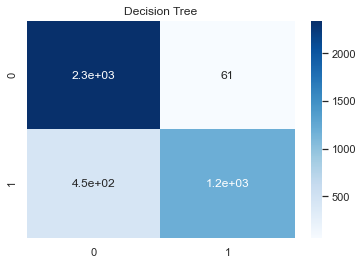

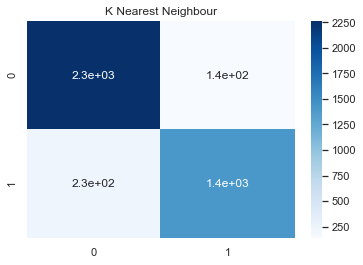

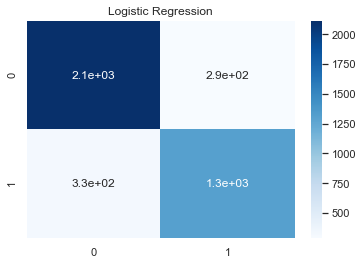

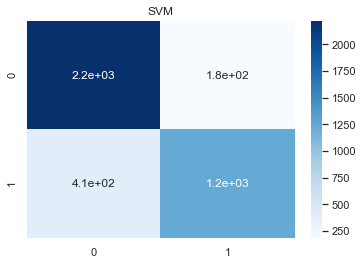

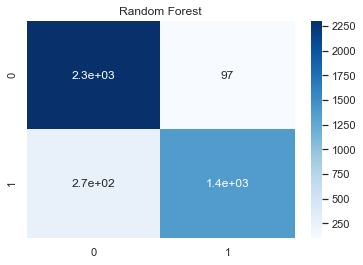

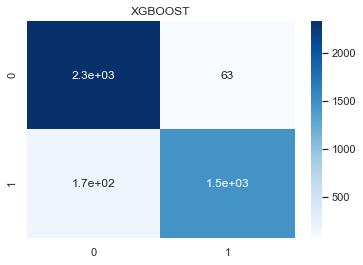

In [26]:
#Computing confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

# 1. Decision tree
ax = plt.axes()
sns.heatmap(tree_matrix, annot = True, cmap = 'Blues')
ax.set_title('Decision Tree')
plt.show()


# 2. K-Nearest Neighbors
ax = plt.axes()
sns.heatmap(knn_matrix, annot = True, cmap = 'Blues')
ax.set_title('K Nearest Neighbour')
plt.show()

# 3. Logistic regression

ax = plt.axes()
sns.heatmap(lr_matrix, annot = True, cmap = 'Blues')
ax.set_title('Logistic Regression')
plt.show()

# 4. Support Vector Machine

ax = plt.axes()
sns.heatmap(svm_matrix, annot = True, cmap = 'Blues')
ax.set_title('SVM')
plt.show()

# 5. Random forest tree

ax = plt.axes()
sns.heatmap(rf_matrix, annot = True, cmap = 'Blues')
ax.set_title('Random Forest')
plt.show()

# 6. XGBoost

ax = plt.axes()
sns.heatmap(xgb_matrix, annot = True, cmap = 'Blues')
ax.set_title('XGBOOST')
plt.show()


In [27]:
# We can now see that XGBoost is the best out of the 6 models
#Thus we will use XG Boost 

xgb = XGBClassifier(max_depth = 5)
#Training on 50,00,000 data points this time
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

C:\Users\Amber\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
print("Accuracy is : " , accuracy_score(y_test, pred))
print("F1 score is : ", f1_score(y_test, pred))

Accuracy is :  0.9423695275785308
F1 score is :  0.926706511481598


# Finding most Important feature

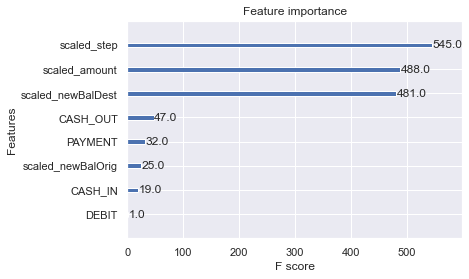

In [29]:
#Finding most important feature
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

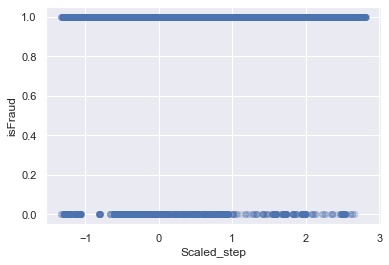

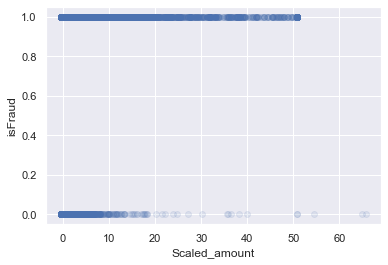

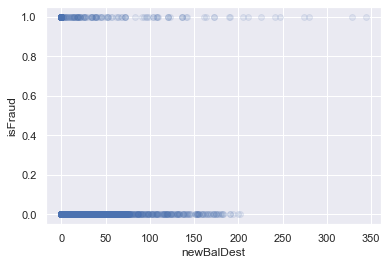

In [30]:
#Plotting scaled step vs isFraud
x_temp = x_train.iloc[:, 5]
y_temp = y_train
plt.scatter(x_temp, y_temp, alpha = 0.05)
plt.xlabel('Scaled_step')
plt.ylabel('isFraud')
plt.show()

#Plotting scaled_amount vs isFraud
x_temp = x_train.iloc[:, 6]
y_temp = y_train
plt.scatter(x_temp, y_temp, alpha = 0.1)
plt.xlabel('Scaled_amount')
plt.ylabel('isFraud')
plt.show()

#Plotting newBalDest vs isFraud
x_temp = x_train.iloc[:, 7]
y_temp = y_train
plt.scatter(x_temp, y_temp, alpha = 0.1)
plt.xlabel('newBalDest')
plt.ylabel('isFraud')
plt.show()

## Hyper parameter Tuning

In [31]:
print(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = { 'learning_rate': [0.01, 0.1, 0.25, 0.3, 0.4, 0.45, 0.5],
          'max_depth':[1, 2, 3, 4, 5, 6, 7],
          'n_estimators':[20, 30, 50, 70, 100],
          'min_child_weight': [1, 3, 5, 7],
          'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
          'colsample_bytree' : [0.3, 0.4, 0.5, 0.6, 0.7, 1]
}

random_search = RandomizedSearchCV(xgb, param_distributions = params, n_iter = 5, cv=5, n_jobs =-1, verbose = 3)
random_search.fit(x_train, y_train)

print('Train Score : ' +str( random_search.score(x_train, y_train)))
print('Test Score : '+str( random_search.score(x_test, y_test)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Amber\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:24:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Score : 0.9636363636363636
Test Score : 0.9436062329953006


In [38]:
print(random_search.best_params_)

{'n_estimators': 70, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 1}


In [39]:
print(random_search.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [40]:
#Now using the values obtained above
xgb_tuned = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=50, n_jobs=12, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
xgb_tuned.fit(x_train, y_train)
xgb_yhat2 = xgb_tuned.predict(x_test)

C:\Users\Amber\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
# EVALUATION

# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('Accuracy score of the new XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat2)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat2)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))



ACCURACY SCORE
Accuracy score of the new XGBoost model is 0.9418748454118229
------------------------------------------------------------------------
F1 SCORE
F1 score of the XGBoost model is 0.9255622426354134
------------------------------------------------------------------------


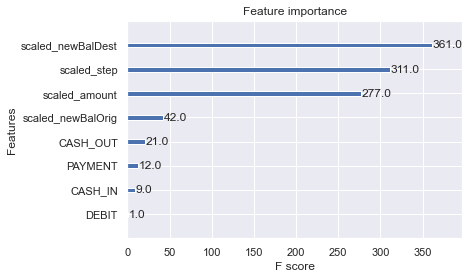

In [43]:
plot_importance(xgb_tuned)
plt.show()

In [44]:
#According to our model, the most important feature is scaled_newBalDest, followed by scaled_step and scaled_amount

In [49]:
#Testing accuracy of xgb2 model on initial datasets
x_new = df.iloc[0:1000000, 0:4]
y_new = df.iloc[0:1000000, 4]
x_new = pd.concat([x_new, df.iloc[0:1000000, 5:10]], axis = 'columns')

pred = xgb_tuned.predict(x_new)


print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('Accuracy score of the new XGBoost model is {}'.format(accuracy_score(y_new, pred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))


ACCURACY SCORE
Accuracy score of the new XGBoost model is 0.975383
------------------------------------------------------------------------
